In [13]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd

In [14]:
#Data
df_belarus = pd.read_csv("Flug_umgeleitet.csv", sep=",")
df_belarus

,Unnamed: 0,Timestamp,UTC,Callsign,Altitude,Speed,Direction,Position NS,Position OW,Flightphase,Country
0,0,1621754943,2021-05-23 07:29:03,RYR1TZ,125,145,37,37.943665,23.962408,climb,Greece
1,1,1621754953,2021-05-23 07:29:13,RYR1TZ,325,161,37,37.949295,23.967785,climb,Greece
2,2,1621754966,2021-05-23 07:29:26,RYR1TZ,900,156,37,37.956924,23.975273,climb,Greece
3,3,1621754978,2021-05-23 07:29:38,RYR1TZ,1425,156,37,37.964096,23.982319,climb,Greece
4,4,1621754988,2021-05-23 07:29:48,RYR1TZ,1775,160,37,37.969940,23.987888,climb,Greece
...,...,...,...,...,...,...,...,...,...,...,...
517,517,1621765273,2021-05-23 10:21:13,RYR1TZ,0,24,317,53.887104,28.027693,descend,Belarus
518,518,1621765279,2021-05-23 10:21:19,RYR1TZ,0,25,317,53.887630,28.026928,descend,Belarus
519,519,1621765291,2021-05-23 10:21:31,RYR1TZ,0,25,317,53.888683,28.025356,descend,Belarus
520,520,1621765302,2021-05-23 10:21:42,RYR1TZ,0,6,317,53.889221,28.024548,descend,Belarus


In [15]:
#Anpassung der Zeit auf UTC Standard
from datetime import datetime

l_date =[]
for i in range(len(df_belarus)):
    date_time_str = df_belarus["UTC"].iloc[i]
    l_date.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S'))

df_belarus["UTC"]=l_date
df_belarus

,Unnamed: 0,Timestamp,UTC,Callsign,Altitude,Speed,Direction,Position NS,Position OW,Flightphase,Country
0,0,1621754943,2021-05-23 07:29:03,RYR1TZ,125,145,37,37.943665,23.962408,climb,Greece
1,1,1621754953,2021-05-23 07:29:13,RYR1TZ,325,161,37,37.949295,23.967785,climb,Greece
2,2,1621754966,2021-05-23 07:29:26,RYR1TZ,900,156,37,37.956924,23.975273,climb,Greece
3,3,1621754978,2021-05-23 07:29:38,RYR1TZ,1425,156,37,37.964096,23.982319,climb,Greece
4,4,1621754988,2021-05-23 07:29:48,RYR1TZ,1775,160,37,37.969940,23.987888,climb,Greece
...,...,...,...,...,...,...,...,...,...,...,...
517,517,1621765273,2021-05-23 10:21:13,RYR1TZ,0,24,317,53.887104,28.027693,descend,Belarus
518,518,1621765279,2021-05-23 10:21:19,RYR1TZ,0,25,317,53.887630,28.026928,descend,Belarus
519,519,1621765291,2021-05-23 10:21:31,RYR1TZ,0,25,317,53.888683,28.025356,descend,Belarus
520,520,1621765302,2021-05-23 10:21:42,RYR1TZ,0,6,317,53.889221,28.024548,descend,Belarus


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Timestamp'}>,
        <AxesSubplot:title={'center':'UTC'}>],
       [<AxesSubplot:title={'center':'Altitude'}>,
        <AxesSubplot:title={'center':'Speed'}>,
        <AxesSubplot:title={'center':'Direction'}>],
       [<AxesSubplot:title={'center':'Position NS'}>,
        <AxesSubplot:title={'center':'Position OW'}>, <AxesSubplot:>]],
      dtype=object)

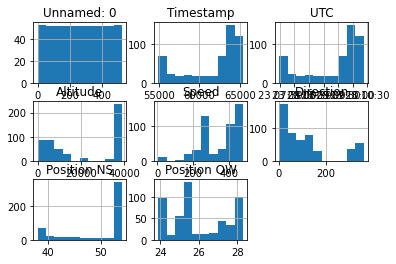

In [16]:
df_belarus.hist()

<AxesSubplot:>

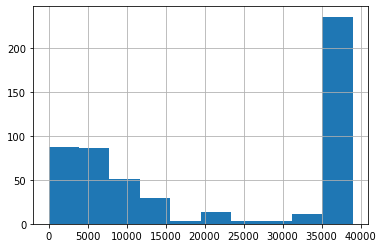

In [17]:
df_belarus["Altitude"].hist()

<AxesSubplot:>

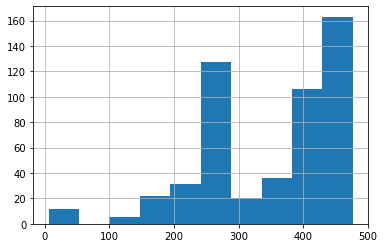

In [18]:
df_belarus["Speed"].hist()

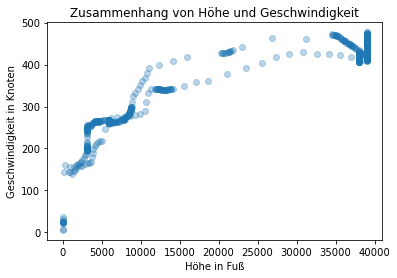

In [19]:
#Zusammenhang zwischen Höhe und Geschwindigkeit Scatterchart
plt.ylabel('Geschwindigkeit in Knoten')
plt.xlabel('Höhe in Fuß')
plt.title('Zusammenhang von Höhe und Geschwindigkeit')
plt.scatter(df_belarus["Altitude"], df_belarus["Speed"], alpha=0.3)

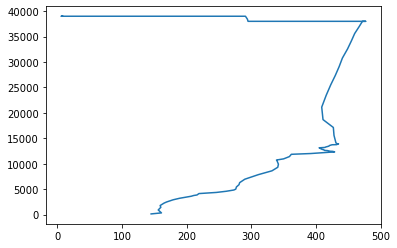

In [20]:
df_2 = pd.DataFrame(df_belarus["Speed"].unique(), columns=["Speed"])
df_2 = df_2.join(df_belarus["Altitude"])
plt.plot(df_2["Speed"], df_2["Altitude"])

In [21]:
#Distanz berechnende Funktion
def distance(s_lat, s_lng, e_lat, e_lng): #Source: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

   # approximate radius of earth in km
   R = 6373.0

   s_lat = s_lat*np.pi/180.0
   s_lng = np.deg2rad(s_lng)
   e_lat = np.deg2rad(e_lat)
   e_lng = np.deg2rad(e_lng)

   d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2

   return 2 * R * np.arcsin(np.sqrt(d))

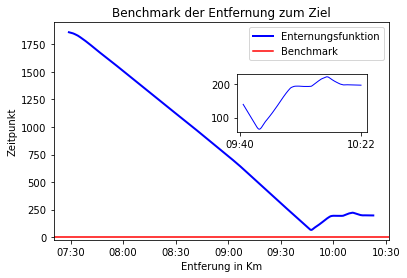

In [38]:
fig, ax = plt.subplots()
xyPos = []
time_zoom = []
xyPos_zoom = []

#Erstelle Liste der Entfernungen zu jedem Zeitpunkt
iteration = 0
for i in df_belarus["Position NS"]:
    #split = df_belarus["Position"].get(iteration).split(',')   #Legacy aus alter csv Datei
    #xyPos.append(distance(float(split[0]), float(split[1]), float(54.641434), float(25.28158)))
    xyPos.append(distance(float(df_belarus["Position NS"].get(iteration)), float(df_belarus["Position OW"].get(iteration)), float(54.641434), float(25.28158)))
    if iteration > 191:
        time_zoom.append(df_belarus["UTC"].get(iteration))
        xyPos_zoom.append(distance(float(df_belarus["Position NS"].get(iteration)), float(df_belarus["Position OW"].get(iteration)), float(54.641434), float(25.28158)))


    iteration += 1

plt.title('Benchmark der Entfernung zum Ziel')
plt.ylabel('Zeitpunkt')
plt.xlabel('Entferung in Km')
ax.plot(df_belarus["UTC"], xyPos, lw=2, label="Enternungsfunktion", c='blue')
ax.axhline(y=0, color='r', label='Benchmark')
ax.legend()
axes = plt.axes([.55, .5, .30, .20])
axes.plot(time_zoom, xyPos_zoom, lw=1, label="Zoom", c='blue')
#axes.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
axes.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
axes.set_xticks([df_belarus["UTC"].iloc[191], df_belarus["UTC"].iloc[-1]])
plt.show()
#plt.savefig('Entfernung.png')